In [13]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
data_dir = Path("./data")
data_dir.mkdir(parents=True, exist_ok=True)

print(f"Data will be saved to {data_dir.resolve()}")

Data will be saved to /Users/Tonni/Desktop/master-code/neural-quantum-tomo/case_studies/w_vanilla_v2/data


In [15]:
def sample_w_state(chain_length: int, num_samples: int, rng=None):
    if rng is None:
        rng = np.random.default_rng()

    chosen_spin_sites = rng.integers(low=0, high=chain_length, size=num_samples)

    samples = []
    for chosen_spin_site in chosen_spin_sites:
        outcome = ['Z'] * chain_length
        outcome[chosen_spin_site] = 'z'
        samples.append(''.join(outcome))
    return samples


chain_length = 80
num_samples = 50_000
sample_rng = np.random.default_rng()

samples = sample_w_state(chain_length, num_samples, rng=sample_rng)

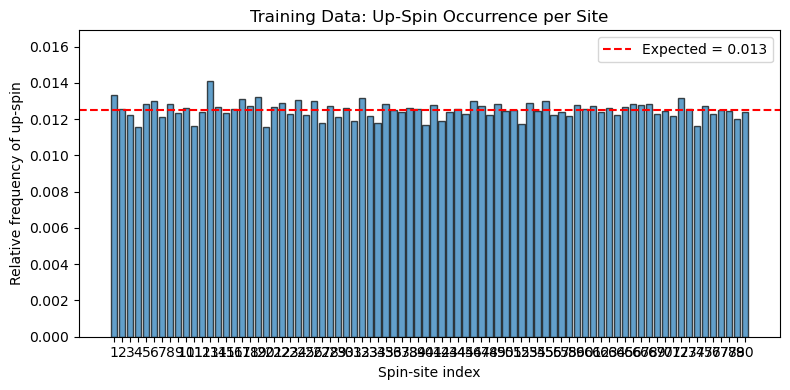

In [16]:
up_counts = np.array([sum(s[i] == 'z' for s in samples) for i in range(chain_length)])
rel_freq  = up_counts / num_samples

fig, ax = plt.subplots(figsize=(8,4))
sites = np.arange(1, chain_length+1)
ax.bar(sites, rel_freq, width=0.8, edgecolor='black', alpha=0.7)
ax.axhline(1/chain_length, color='red', linestyle='--', label=f'Expected = {1/chain_length:.3f}')

ax.set_xlabel('Spin‐site index')
ax.set_ylabel('Relative frequency of up‐spin')
ax.set_title('Training Data: Up‐Spin Occurrence per Site')
ax.set_xticks(sites)
ax.set_ylim(0, rel_freq.max()*1.2)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [17]:
file_name = f'w_vanilla_{chain_length}_{num_samples}.txt'
file_path = data_dir / file_name

with open(file_path, 'w') as f:
    for sample in samples:
        f.write(sample + '\n')

print(f"Wrote {len(samples)} samples to {file_path.resolve()}")

Wrote 50000 samples to /Users/Tonni/Desktop/master-code/neural-quantum-tomo/case_studies/w_vanilla_v2/data/w_vanilla_80_50000.txt
